In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

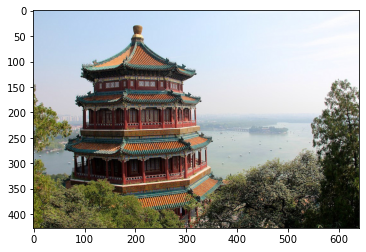

In [18]:
china = load_sample_image('china.jpg')
china
china.dtype
china.shape
#长，宽，像素（三个特征决定一种颜色）
china[0][0]
plt.imshow(china)

In [19]:
newimage = china.reshape(427*640,3)
newimage


array([[174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       ...,
       [ 43,  49,  39],
       [ 13,  21,   6],
       [ 15,  24,   7]], dtype=uint8)

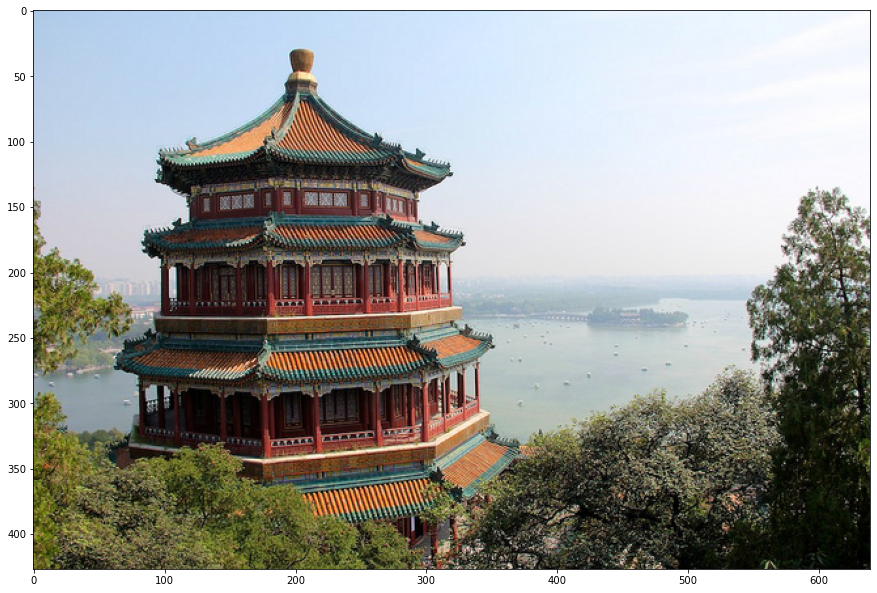

In [20]:
import pandas as pd
#去除颜色的重复值
pd.DataFrame(newimage).drop_duplicates().shape

plt.figure(figsize=(15,15))
plt.imshow(china)

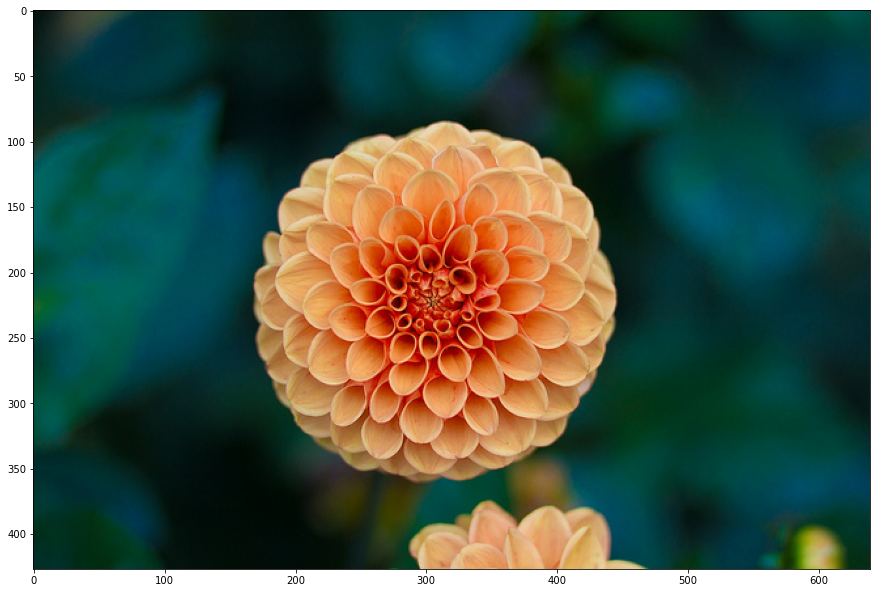

In [21]:
flower = load_sample_image("flower.jpg")
plt.figure(figsize=(15,15))
plt.imshow(flower)

In [22]:
#决定超参数，数据预处理
n_clusters = 64

#plt.imshow在浮点数上表现优异，所以对其进行归一化处理

china = np.array(china,dtype=np.float64) / china.max()



In [23]:
china  > 0


array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True, False]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

In [24]:
w, h, d = original_shape = tuple(china.shape)


In [25]:
w

427

In [26]:
h

640

In [27]:
d

3

In [28]:
#要求d必须等于3，否则报错
assert d == 3

In [29]:
d_ = 5
assert d_ == 3

AssertionError: 

In [ ]:
image_array = np.reshape(china, (w * h, d))
image_array

In [ ]:
image_array.shape

In [ ]:
a = np.random.random((2,4))
a

In [ ]:
a.reshape(4,2)

In [ ]:
np.reshape(a,(4,2))

In [35]:
#首先使用1000个数据来找出质心
image_array_sample = shuffle(image_array,random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_clusters,random_state=0).fit(image_array_sample)

#返回了64个质心
kmeans.cluster_centers_.shape

#找出质心后，对已经存在的质心进行聚类
labels = kmeans.predict(image_array)
labels.shape



(273280,)

In [37]:
set(labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63}

In [39]:
#用质心来替换所有的样本
image_kmeans = image_array.copy()
image_kmeans

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [42]:
for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

image_kmeans
pd.DataFrame(image_kmeans).drop_duplicates().shape

(64, 3)

In [43]:
image_kmeans = image_kmeans.reshape(w,h,d)
image_kmeans.shape

(427, 640, 3)

In [48]:
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]

#计算x2的样本点到x1的样本点中的距离，并返回最近的质心的索引
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)
labels_random

array([55, 55, 55, ..., 52, 60, 60], dtype=int64)

In [49]:
set(labels_random)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63}

In [52]:
image_random = image_array.copy()
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]

image_random = image_random.reshape(w,h,d)
image_random.shape

(427, 640, 3)

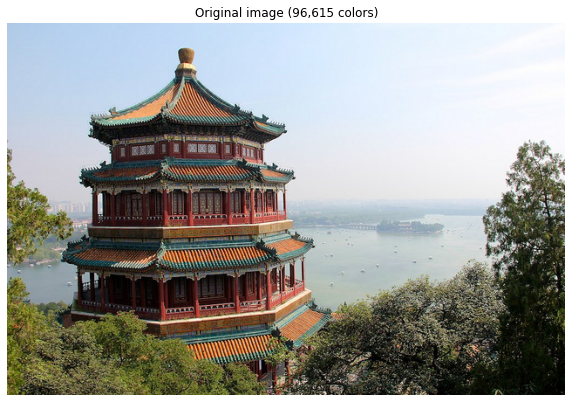

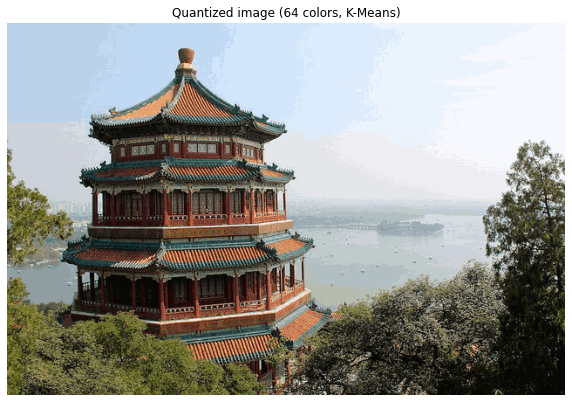

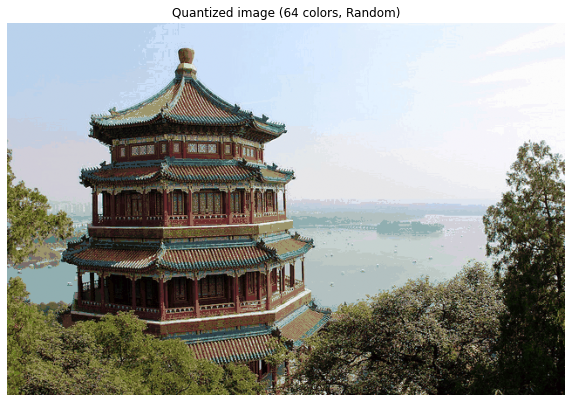

In [53]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(image_kmeans)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(image_random)
plt.show()